## Optimization Attempt # 2
    Remove "STATUS" column - presumed to not impact outcome.
    Create Bins for "ASK_AMT", given the wide range of Loan Ask Amounts, replace ASK_AMT column with ASK_BINS
    Increase number of hidden layers to 6 
    Increase neurons per layer to 600 for the first layer and 400 for subsequent layers
    Increase Epochs to 600

## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.callbacks import Callback, ModelCheckpoint

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore')

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

2023-08-28 21:47:28.129879: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_clean = application_df.copy()
application_clean.drop(columns=["EIN","NAME","STATUS"], axis=1, inplace=True)
application_clean.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_clean.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
#Create variable for ask amt
amt = application_clean["ASK_AMT"]

In [5]:
#check mean
amt.mean()

2769198.6820607013

In [6]:
#check median
amt.median()

5000.0

In [7]:
# check value counts
amt_values = amt.value_counts()
amt_values.sort_values()

38721         1
14698         1
110885        1
11659         1
25846         1
          ...  
6725          3
63981         3
15583         3
10478         3
5000      25398
Name: ASK_AMT, Length: 8747, dtype: int64

In [8]:
#check values
amt_values

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [9]:
#create bins/labes for binning
bins = [0, 5001, 10000, 20000, 50000, 100000, 250000, 500000, 1000000, 10000000, 90000000000]
labels = [" 5K ", " 5K-10K ", " 10K-20k", " 20k-50k ", " 50k-100k ", "100k-250k", "250k-500k", "500k-1M", "1M-10M", ">10M" ]

In [10]:
# Create new column with binned amounts
application_clean["ASK_BINS"] = pd.cut(amt, bins, labels=labels)

In [11]:
# inspect bins
application_clean.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,ASK_BINS
0,T10,Independent,C1000,ProductDev,Association,0,N,5000,1,5K
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1,100k-250k
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0,5K
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1,5K-10K
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1,100k-250k


In [12]:
#Check bin amounts
application_clean["ASK_BINS"].value_counts()

 5K           25399
 20k-50k       1609
100k-250k      1441
 50k-100k      1423
1M-10M         1165
250k-500k       863
 10K-20k        789
500k-1M         650
 5K-10K         548
>10M            412
Name: ASK_BINS, dtype: int64

In [13]:
#drop initial ask_amt column since it has been replaced
application_clean.drop(columns="ASK_AMT", axis=1, inplace=True)

In [17]:
# Look at APPLICATION_TYPE value counts for binning
application_values = application_clean["APPLICATION_TYPE"].value_counts()
application_values

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [18]:
#Compile values into dictionary
application_dict = application_values.to_dict()

In [19]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = []

for key,value in application_dict.items():
  if value < 528:
    application_types_to_replace.append(key)

# Replace in dataframe
for app in application_types_to_replace:
    application_clean['APPLICATION_TYPE'] = application_clean['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_clean['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [20]:
# Look at CLASSIFICATION value counts for binning
class_values = application_clean["CLASSIFICATION"].value_counts()
class_values

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [21]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_values_limited = application_clean["CLASSIFICATION"].value_counts()[application_clean["CLASSIFICATION"].value_counts() >1]
class_values_limited

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [22]:
# Convert value counts to dict
class_dict = class_values.to_dict()

In [23]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = []

for key,value in class_dict.items():
  if value < 286:
    classifications_to_replace.append(key)


# Replace in dataframe
for cls in classifications_to_replace:
    application_clean['CLASSIFICATION'] = application_clean['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_clean['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [24]:
# application_clean.drop(columns=["CLASSIFICATION", "APPLICATION_TYPE", "INCOME_AMT"], axis=1, inplace=True)
application_clean.nunique()

APPLICATION_TYPE           9
AFFILIATION                6
CLASSIFICATION             8
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
IS_SUCCESSFUL              2
ASK_BINS                  10
dtype: int64

In [26]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummies = pd.get_dummies(application_clean, columns=["CLASSIFICATION", "APPLICATION_TYPE", \
                                                                 "ASK_BINS","USE_CASE","AFFILIATION", "ORGANIZATION","SPECIAL_CONSIDERATIONS","INCOME_AMT"])

application_dummies.head()

,IS_SUCCESSFUL,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1700,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,APPLICATION_TYPE_Other,...,SPECIAL_CONSIDERATIONS_Y,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [27]:
# Split our preprocessed data into our features and target arrays
y = application_dummies["IS_SUCCESSFUL"].values.reshape(-1, 1)
X = application_dummies.copy()
X.drop(columns="IS_SUCCESSFUL", axis=1, inplace=True)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [28]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [37]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# Define the model - deep neural net
nn = tf.keras.models.Sequential()

#Define layers and neurons per layer
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 600
hidden_nodes_layer2 = 400
hidden_nodes_layer3 = 400
hidden_nodes_layer4 = 400
hidden_nodes_layer5 = 400
hidden_nodes_layer6 = 400

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# # # Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# # Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# # Sixth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 600)               32400     
                                                                 
 dense_10 (Dense)            (None, 400)               240400    
                                                                 
 dense_11 (Dense)            (None, 400)               160400    
                                                                 
 dense_12 (Dense)            (None, 400)               160400    
                                                                 
 dense_13 (Dense)            (None, 400)               160400    
                                                                 
 dense_14 (Dense)            (None, 400)               160400    
                                                                 
 dense_15 (Dense)            (None, 1)                

In [38]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=600)


Epoch 1/600
804/804 [==============================] - 8s 9ms/step - loss: 0.5724 - accuracy: 0.7193
Epoch 2/600
804/804 [==============================] - 8s 10ms/step - loss: 0.5567 - accuracy: 0.7285
Epoch 3/600
804/804 [==============================] - 8s 10ms/step - loss: 0.5530 - accuracy: 0.7268
Epoch 4/600
804/804 [==============================] - 7s 9ms/step - loss: 0.5499 - accuracy: 0.7282
Epoch 5/600
804/804 [==============================] - 7s 9ms/step - loss: 0.5489 - accuracy: 0.7315
Epoch 6/600
804/804 [==============================] - 7s 9ms/step - loss: 0.5495 - accuracy: 0.7313
Epoch 7/600
804/804 [==============================] - 7s 9ms/step - loss: 0.5469 - accuracy: 0.7320
Epoch 8/600
804/804 [==============================] - 8s 9ms/step - loss: 0.5462 - accuracy: 0.7315
Epoch 9/600
804/804 [==============================] - 8s 9ms/step - loss: 0.5437 - accuracy: 0.7349
Epoch 10/600
804/804 [==============================] - 8s 9ms/step - loss: 0.5427 - accu

804/804 [==============================] - 6s 7ms/step - loss: 0.5112 - accuracy: 0.7501
Epoch 161/600
804/804 [==============================] - 6s 8ms/step - loss: 0.5131 - accuracy: 0.7498
Epoch 162/600
804/804 [==============================] - 6s 8ms/step - loss: 0.5093 - accuracy: 0.7508
Epoch 163/600
804/804 [==============================] - 6s 7ms/step - loss: 0.5092 - accuracy: 0.7497
Epoch 164/600
804/804 [==============================] - 6s 8ms/step - loss: 0.5101 - accuracy: 0.7503
Epoch 165/600
804/804 [==============================] - 6s 8ms/step - loss: 0.5091 - accuracy: 0.7496
Epoch 166/600
804/804 [==============================] - 6s 7ms/step - loss: 0.5120 - accuracy: 0.7507
Epoch 167/600
804/804 [==============================] - 6s 7ms/step - loss: 0.5091 - accuracy: 0.7500
Epoch 168/600
804/804 [==============================] - 6s 8ms/step - loss: 0.5115 - accuracy: 0.7502
Epoch 169/600
804/804 [==============================] - 6s 8ms/step - loss: 0.5101 - a

804/804 [==============================] - 7s 8ms/step - loss: 0.5108 - accuracy: 0.7489
Epoch 318/600
804/804 [==============================] - 7s 9ms/step - loss: 0.5108 - accuracy: 0.7488
Epoch 319/600
804/804 [==============================] - 8s 10ms/step - loss: 0.5138 - accuracy: 0.7477
Epoch 320/600
804/804 [==============================] - 7s 9ms/step - loss: 0.5079 - accuracy: 0.7484
Epoch 321/600
804/804 [==============================] - 8s 10ms/step - loss: 0.5078 - accuracy: 0.7491
Epoch 322/600
804/804 [==============================] - 7s 9ms/step - loss: 0.5332 - accuracy: 0.7500
Epoch 323/600
804/804 [==============================] - 7s 9ms/step - loss: 0.5075 - accuracy: 0.7492
Epoch 324/600
804/804 [==============================] - 7s 9ms/step - loss: 0.5073 - accuracy: 0.7499
Epoch 325/600
804/804 [==============================] - 7s 9ms/step - loss: 0.5071 - accuracy: 0.7495
Epoch 326/600
804/804 [==============================] - 7s 9ms/step - loss: 0.5077 -

804/804 [==============================] - 8s 10ms/step - loss: 0.5074 - accuracy: 0.7500
Epoch 475/600
804/804 [==============================] - 9s 12ms/step - loss: 0.5073 - accuracy: 0.7490
Epoch 476/600
804/804 [==============================] - 1071s 1s/step - loss: 0.5076 - accuracy: 0.7499
Epoch 477/600
804/804 [==============================] - 7s 8ms/step - loss: 0.5176 - accuracy: 0.7498
Epoch 478/600
804/804 [==============================] - 10s 12ms/step - loss: 0.5092 - accuracy: 0.7501
Epoch 479/600
804/804 [==============================] - 12s 14ms/step - loss: 0.5082 - accuracy: 0.7505
Epoch 480/600
804/804 [==============================] - 10s 12ms/step - loss: 0.5159 - accuracy: 0.7503
Epoch 481/600
804/804 [==============================] - 10s 13ms/step - loss: 0.5073 - accuracy: 0.7500
Epoch 482/600
804/804 [==============================] - 9s 11ms/step - loss: 0.5081 - accuracy: 0.7499
Epoch 483/600
804/804 [==============================] - 10s 13ms/step - l

Epoch 553/600
804/804 [==============================] - 3206s 4s/step - loss: 0.5086 - accuracy: 0.7486
Epoch 554/600
804/804 [==============================] - 7s 9ms/step - loss: 0.5075 - accuracy: 0.7491
Epoch 555/600
804/804 [==============================] - 6s 7ms/step - loss: 0.5074 - accuracy: 0.7494
Epoch 556/600
804/804 [==============================] - 8s 10ms/step - loss: 0.5077 - accuracy: 0.7497
Epoch 557/600
804/804 [==============================] - 9s 11ms/step - loss: 0.5098 - accuracy: 0.7495
Epoch 558/600
804/804 [==============================] - 12s 15ms/step - loss: 0.5278 - accuracy: 0.7489
Epoch 559/600
804/804 [==============================] - 3206s 4s/step - loss: 0.5094 - accuracy: 0.7487
Epoch 560/600
804/804 [==============================] - 8s 10ms/step - loss: 0.5084 - accuracy: 0.7467
Epoch 561/600
804/804 [==============================] - 6s 8ms/step - loss: 0.5074 - accuracy: 0.7497
Epoch 562/600
804/804 [==============================] - 8s 10ms

In [33]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5919 - accuracy: 0.7277 - 1s/epoch - 4ms/step
Loss: 0.591920018196106, Accuracy: 0.7276967763900757


In [34]:
# Export our model to HDF5
nn.save('H5_Files/AlphabetSoupCharity_Optimization2.h5')


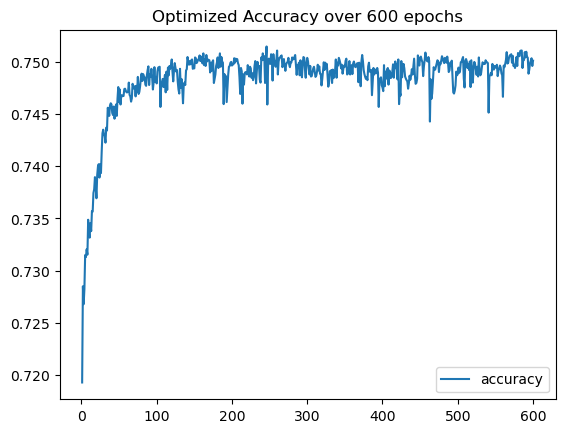

In [41]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="accuracy",title="Optimized Accuracy over 600 epochs")

plt.savefig('Plots/optimized_accuracy2.png')
plt.show()

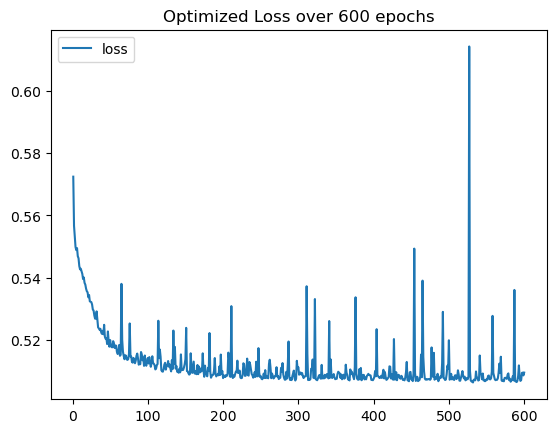

In [42]:
# Plot the loss
history_df.plot(y="loss", title="Optimized Loss over 600 epochs")

plt.savefig('Plots/optimized_loss2.png')
plt.show()